What is Boosting in Machine Learning?
Boosting is an ensemble technique in machine learning that combines multiple weak learners, typically decision trees, in a sequential manner to form a strong learner. Each model in the sequence is trained to correct the errors of the previous ones, thereby improving overall performance.

How does Boosting differ from Bagging?
Boosting and Bagging are both ensemble methods but differ significantly in how they train their models. In Bagging, models are trained independently and in parallel using different subsets of the data (with replacement), which helps reduce variance. In Boosting, models are trained sequentially, where each new model focuses on correcting the errors of the previous ones, aiming to reduce bias. Bagging gives equal weight to each learner, while Boosting gives more weight to misclassified examples. Random Forest is a classic Bagging method, whereas AdaBoost and Gradient Boosting are examples of Boosting.

What is the key idea behind AdaBoost?
The key idea of AdaBoost (Adaptive Boosting) is to improve the accuracy of weak classifiers by focusing on the errors they make. It increases the weights of misclassified samples so that the next weak learner can pay more attention to them. The final prediction is a weighted majority vote of all the classifiers.

Explain the working of AdaBoost with an example.
AdaBoost starts by assigning equal weights to all data points. A weak learner is trained, and the instances it misclassifies get increased weights. A new weak learner is then trained on this updated dataset. This process repeats for several iterations. For example, if a decision stump misclassifies certain points, the next stump will give those points higher priority. The final output is a weighted vote across all models, with more accurate models having more say.

What is Gradient Boosting, and how is it different from AdaBoost?
Gradient Boosting is a boosting method that builds models sequentially by optimizing a loss function using gradient descent. Unlike AdaBoost, which adjusts weights on data points, Gradient Boosting fits new models to the residuals (errors) of prior models. It minimizes the loss by calculating gradients and moving in the direction that most reduces error.

What is the loss function in Gradient Boosting?
The loss function in Gradient Boosting depends on the task. For regression, it's typically Mean Squared Error (MSE), and for classification, it's Log Loss or Cross Entropy. The boosting algorithm iteratively minimizes this loss using gradient descent.

How does XGBoost improve over traditional Gradient Boosting?
XGBoost enhances traditional Gradient Boosting by adding regularization (L1 and L2) to reduce overfitting, supporting parallel computation to speed up training, automatically handling missing values, using tree pruning for better optimization, and being memory-efficient. These improvements make XGBoost faster and often more accurate.

What is the difference between XGBoost and CatBoost?
XGBoost and CatBoost are both powerful gradient boosting frameworks, but they differ in handling data. XGBoost requires manual preprocessing of categorical variables (e.g., one-hot encoding), whereas CatBoost automatically processes categorical features, making it more user-friendly for mixed-type datasets. CatBoost also uses ordered boosting to prevent overfitting and performs better on datasets with many categorical features, while XGBoost is often faster on purely numerical data.

What are some real-world applications of Boosting techniques?
Boosting is widely used in real-world applications such as fraud detection in banking, customer churn prediction in telecom, click-through rate prediction in advertising, medical diagnosis, credit risk modeling, stock market forecasting, and search engine result ranking.

How does regularization help in XGBoost?
Regularization in XGBoost (through L1 and L2 penalties) controls the complexity of individual trees and prevents overfitting by discouraging overly complex models. It ensures the model generalizes well on unseen data by penalizing models that rely too heavily on any one feature or data pattern.

What are some hyperparameters to tune in Gradient Boosting models?
Important hyperparameters in Gradient Boosting include n_estimators (number of trees), learning_rate (step size shrinkage), max_depth (maximum depth of trees), subsample (fraction of samples for fitting individual base learners), min_samples_split, and colsample_bytree (fraction of features used per tree, especially in XGBoost). Proper tuning can significantly impact model performance.

What is the concept of Feature Importance in Boosting?
Feature Importance in Boosting shows how much each feature contributes to the model's decision-making. It's derived from the frequency or quality of splits made on features across trees. High feature importance indicates that a feature is frequently used and contributes significantly to reducing error.

Why is CatBoost efficient for categorical data?
CatBoost is efficient for categorical data because it handles categorical variables natively using ordered boosting and target-based statistical encoding. It avoids target leakage through permutations and doesn’t require manual preprocessing like one-hot encoding, making it ideal for datasets with many categorical features.

In [ ]:
#Q14
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# 1. Create a sample dataset
X_clf, y_clf = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)

# 2. Split data into training and testing sets
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)

# 3. Train an AdaBoost Classifier
ada_clf = AdaBoostClassifier(random_state=42)
ada_clf.fit(X_train_clf, y_train_clf)

# 4. Make predictions and print accuracy
y_pred_ada_clf = ada_clf.predict(X_test_clf)
accuracy_ada_clf = accuracy_score(y_test_clf, y_pred_ada_clf)
print(f"AdaBoost Classifier Accuracy: {accuracy_ada_clf:.4f}")

AdaBoost Classifier Accuracy: 0.8467


In [ ]:
#Q15
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error

# 1. Create a sample regression dataset
X_reg, y_reg = make_regression(n_samples=1000, n_features=20, n_informative=10, random_state=42)

# 2. Split data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# 3. Train an AdaBoost Regressor
ada_reg = AdaBoostRegressor(random_state=42)
ada_reg.fit(X_train_reg, y_train_reg)

# 4. Make predictions and evaluate using MAE
y_pred_ada_reg = ada_reg.predict(X_test_reg)
mae_ada_reg = mean_absolute_error(y_test_reg, y_pred_ada_reg)
print(f"AdaBoost Regressor MAE: {mae_ada_reg:.4f}")

AdaBoost Regressor MAE: 84.1422


In [ ]:
#Q16
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier

# 1. Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_bc, y_bc = breast_cancer.data, breast_cancer.target

# 2. Split data into training and testing sets
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.3, random_state=42)

# 3. Train a Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train_bc, y_train_bc)

# 4. Print feature importance
print("Gradient Boosting Classifier Feature Importance:")
for i, importance in enumerate(gb_clf.feature_importances_):
    print(f"Feature {i} ({breast_cancer.feature_names[i]}): {importance:.4f}")

Gradient Boosting Classifier Feature Importance:
Feature 0 (mean radius): 0.0000
Feature 1 (mean texture): 0.0184
Feature 2 (mean perimeter): 0.0004
Feature 3 (mean area): 0.0003
Feature 4 (mean smoothness): 0.0009
Feature 5 (mean compactness): 0.0017
Feature 6 (mean concavity): 0.0012
Feature 7 (mean concave points): 0.4349
Feature 8 (mean symmetry): 0.0002
Feature 9 (mean fractal dimension): 0.0007
Feature 10 (radius error): 0.0100
Feature 11 (texture error): 0.0013
Feature 12 (perimeter error): 0.0020
Feature 13 (area error): 0.0055
Feature 14 (smoothness error): 0.0004
Feature 15 (compactness error): 0.0044
Feature 16 (concavity error): 0.0156
Feature 17 (concave points error): 0.0034
Feature 18 (symmetry error): 0.0018
Feature 19 (fractal dimension error): 0.0006
Feature 20 (worst radius): 0.0454
Feature 21 (worst texture): 0.0472
Feature 22 (worst perimeter): 0.0510
Feature 23 (worst area): 0.0480
Feature 24 (worst smoothness): 0.0045
Feature 25 (worst compactness): 0.0010
Featur

In [ ]:
#Q17
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Using the regression data from Problem 15 for consistency
X_reg, y_reg = make_regression(n_samples=1000, n_features=20, n_informative=10, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# 1. Train a Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train_reg, y_train_reg)

# 2. Make predictions and evaluate using R-Squared Score
y_pred_gb_reg = gb_reg.predict(X_test_reg)
r2_gb_reg = r2_score(y_test_reg, y_pred_gb_reg)
print(f"Gradient Boosting Regressor R-Squared Score: {r2_gb_reg:.4f}")

Gradient Boosting Regressor R-Squared Score: 0.9078


In [ ]:
#Q18
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Using the classification data from Problem 14 for consistency
X_clf, y_clf = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)

# 1. Train an XGBoost Classifier (Parameter removed here)
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train_clf, y_train_clf)
y_pred_xgb_clf = xgb_clf.predict(X_test_clf)
accuracy_xgb_clf = accuracy_score(y_test_clf, y_pred_xgb_clf)
print(f"XGBoost Classifier Accuracy: {accuracy_xgb_clf:.4f}")

# 2. Train a Gradient Boosting Classifier for comparison
gb_clf_compare = GradientBoostingClassifier(random_state=42)
gb_clf_compare.fit(X_train_clf, y_train_clf)
y_pred_gb_clf_compare = gb_clf_compare.predict(X_test_clf)
accuracy_gb_clf_compare = accuracy_score(y_test_clf, y_pred_gb_clf_compare)
print(f"Gradient Boosting Classifier Accuracy (for comparison): {accuracy_gb_clf_compare:.4f}")

XGBoost Classifier Accuracy: 0.9367
Gradient Boosting Classifier Accuracy (for comparison): 0.9067


In [ ]:
#Q19
!pip install CatBoost
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
from catboost import CatBoostClassifier

# Using the classification data from Problem 14 for consistency
X_clf, y_clf = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)

# 1. Train a CatBoost Classifier
cat_clf = CatBoostClassifier(verbose=0, random_state=42) # verbose=0 suppresses training output
cat_clf.fit(X_train_clf, y_train_clf)

# 2. Make predictions and evaluate using F1-Score
y_pred_cat_clf = cat_clf.predict(X_test_clf)
f1_cat_clf = f1_score(y_test_clf, y_pred_cat_clf)
print(f"CatBoost Classifier F1-Score: {f1_cat_clf:.4f}")

CatBoost Classifier F1-Score: 0.9231


In [ ]:
#Q20
!pip install xgboost
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Using the regression data from Problem 15 for consistency
X_reg, y_reg = make_regression(n_samples=1000, n_features=20, n_informative=10, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# 1. Train an XGBoost Regressor (use_label_encoder removed)
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42)
xgb_reg.fit(X_train_reg, y_train_reg)

# 2. Make predictions and evaluate using MSE
y_pred_xgb_reg = xgb_reg.predict(X_test_reg)
mse_xgb_reg = mean_squared_error(y_test_reg, y_pred_xgb_reg)
print(f"XGBoost Regressor MSE: {mse_xgb_reg:.4f}")

XGBoost Regressor MSE: 6597.9244


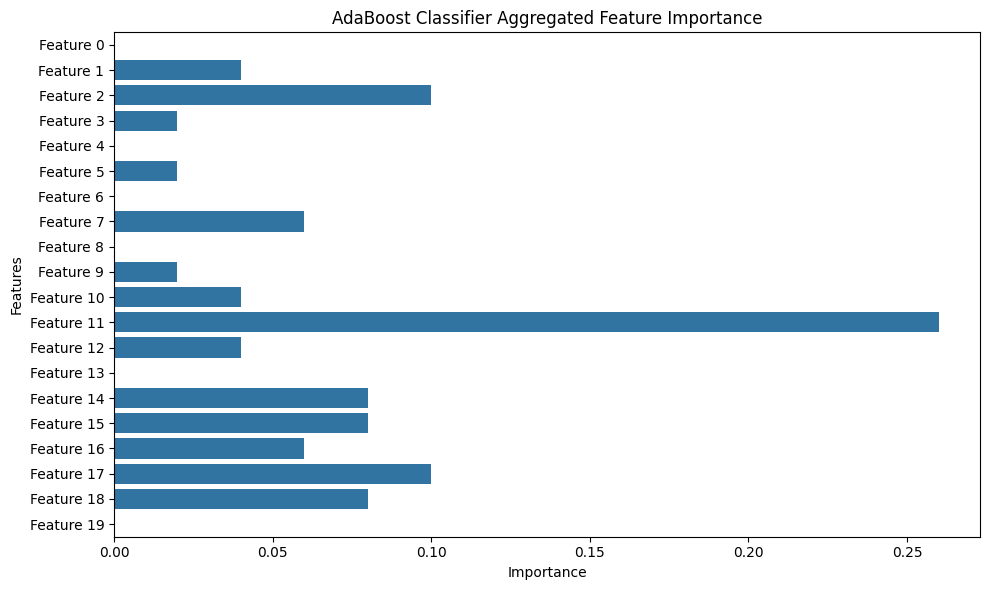

In [ ]:
#Q21
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier

# Using the classification data from Problem 14 for consistency
X_clf, y_clf = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)

# 1. Train an AdaBoost Classifier
ada_clf = AdaBoostClassifier(random_state=42)
ada_clf.fit(X_train_clf, y_train_clf)

# 2. Calculate and visualize feature importance (aggregated from base estimators)
feature_importances = np.zeros(X_train_clf.shape[1])
for estimator in ada_clf.estimators_:
    if hasattr(estimator, 'feature_importances_'):
        feature_importances += estimator.feature_importances_
feature_importances /= len(ada_clf.estimators_) # Average them

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=[f'Feature {i}' for i in range(len(feature_importances))])
plt.title('AdaBoost Classifier Aggregated Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

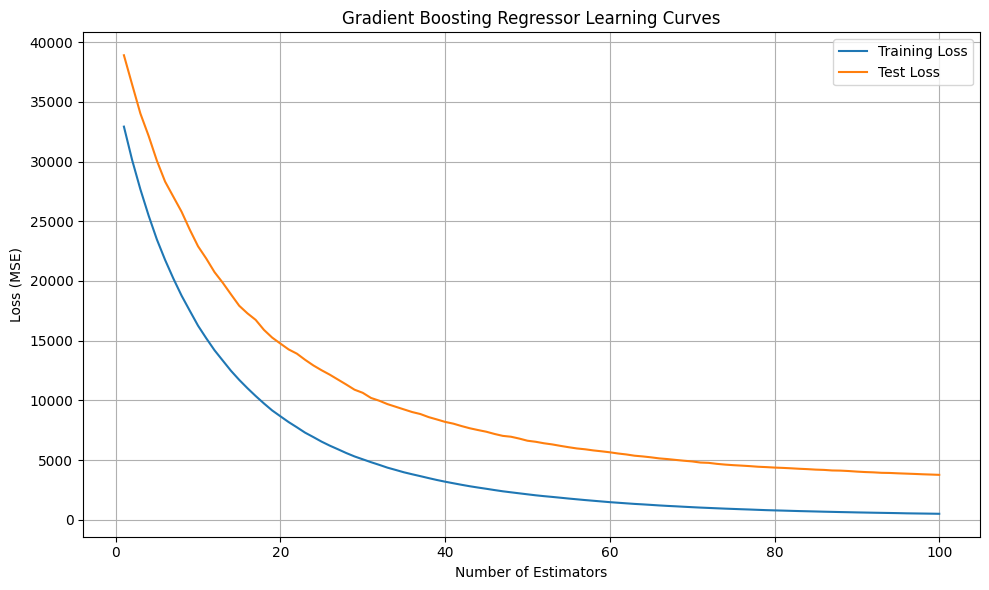

In [ ]:
#Q22
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error # <--- We will explicitly use this!

# Using the regression data from Problem 15 for consistency
X_reg, y_reg = make_regression(n_samples=1000, n_features=20, n_informative=10, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# 1. Train a Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train_reg, y_train_reg)

# 2. Plot learning curves
test_score = np.zeros((gb_reg.n_estimators,), dtype=np.float64)

# CORRECTED WAY TO CALCULATE TEST LOSS AT EACH STAGE
# We iterate through the staged predictions and calculate MSE for each stage
for i, y_pred in enumerate(gb_reg.staged_predict(X_test_reg)):
    test_score[i] = mean_squared_error(y_test_reg, y_pred) # <--- THIS IS THE RELIABLE FIX

plt.figure(figsize=(10, 6))
plt.plot(np.arange(gb_reg.n_estimators) + 1, gb_reg.train_score_, label='Training Loss')
plt.plot(np.arange(gb_reg.n_estimators) + 1, test_score, label='Test Loss')
plt.title('Gradient Boosting Regressor Learning Curves')
plt.xlabel('Number of Estimators')
plt.ylabel('Loss (MSE)') # Label explicitly as MSE now
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

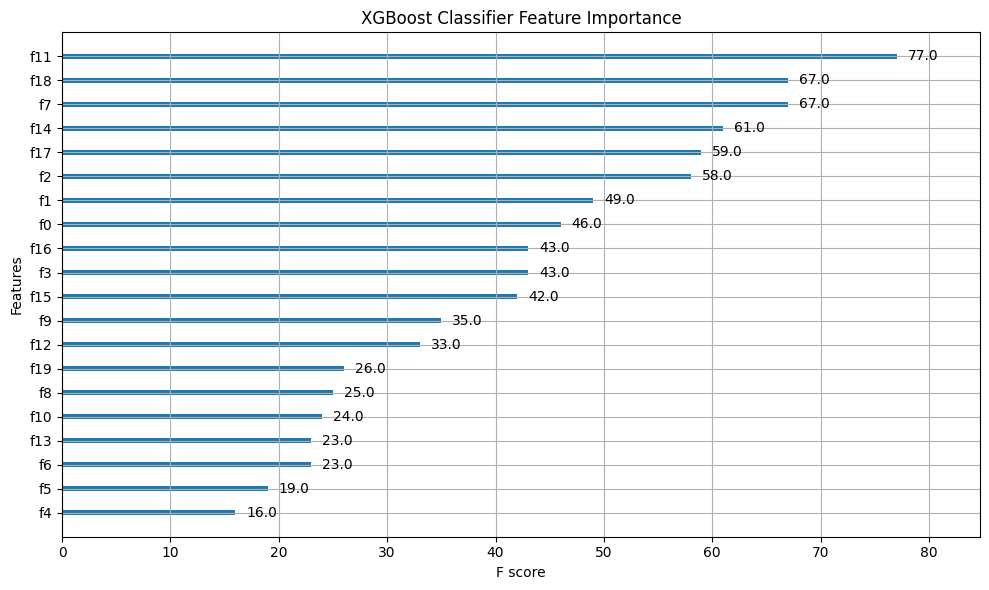

In [ ]:
#Q23
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import xgboost as xgb

# Using the classification data from Problem 14 for consistency
X_clf, y_clf = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)

# 1. Train an XGBoost Classifier (use_label_encoder removed)
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train_clf, y_train_clf)

# 2. Visualize feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_clf, ax=plt.gca())
plt.title('XGBoost Classifier Feature Importance')
plt.tight_layout()
plt.show()

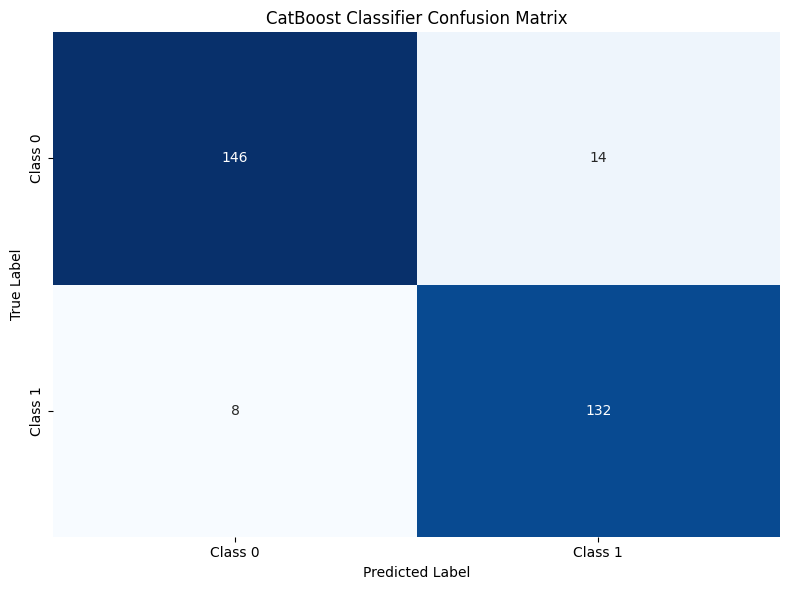

In [ ]:
#Q24
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier # Ensure catboost is installed: pip install catboost

# Using the classification data from Problem 14 for consistency
X_clf, y_clf = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)

# 1. Train a CatBoost Classifier
cat_clf = CatBoostClassifier(verbose=0, random_state=42)
cat_clf.fit(X_train_clf, y_train_clf)
y_pred_cat_clf = cat_clf.predict(X_test_clf)

# 2. Plot the confusion matrix
cm = confusion_matrix(y_test_clf, y_pred_cat_clf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('CatBoost Classifier Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

AdaBoost Classifier with 10 estimators Accuracy: 0.8100
AdaBoost Classifier with 50 estimators Accuracy: 0.8467
AdaBoost Classifier with 100 estimators Accuracy: 0.8267
AdaBoost Classifier with 200 estimators Accuracy: 0.8467
AdaBoost Classifier with 300 estimators Accuracy: 0.8533


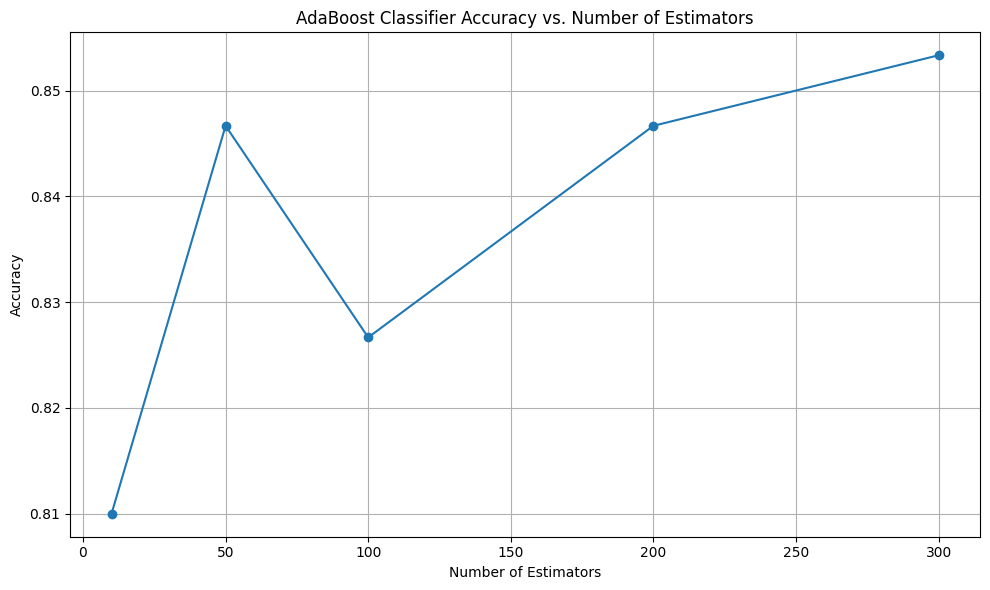

In [ ]:
#Q25
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Using the classification data from Problem 14 for consistency
X_clf, y_clf = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)

# 1. Define different numbers of estimators to test
estimators_range = [10, 50, 100, 200, 300]
accuracies_ada_estimators = []

# 2. Train and evaluate for each number of estimators
for n_est in estimators_range:
    ada_clf_tuned = AdaBoostClassifier(n_estimators=n_est, random_state=42)
    ada_clf_tuned.fit(X_train_clf, y_train_clf)
    y_pred_tuned = ada_clf_tuned.predict(X_test_clf)
    acc = accuracy_score(y_test_clf, y_pred_tuned)
    accuracies_ada_estimators.append(acc)
    print(f"AdaBoost Classifier with {n_est} estimators Accuracy: {acc:.4f}")

# 3. Plot the results
plt.figure(figsize=(10, 6))
plt.plot(estimators_range, accuracies_ada_estimators, marker='o')
plt.title('AdaBoost Classifier Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()

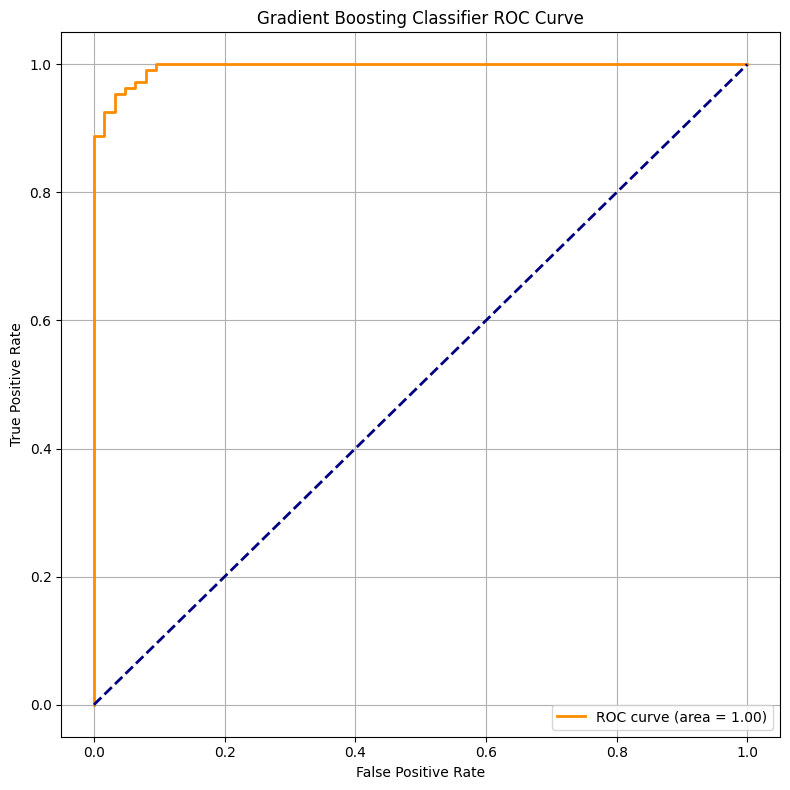

In [ ]:
#Q26
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc

# Using the Breast Cancer dataset from Problem 16 for consistency
breast_cancer = load_breast_cancer()
X_bc, y_bc = breast_cancer.data, breast_cancer.target
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.3, random_state=42)

# 1. Train a Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train_bc, y_train_bc)

# 2. Get probability predictions for the positive class
y_pred_proba_gb_clf = gb_clf.predict_proba(X_test_bc)[:, 1]

# 3. Calculate ROC curve points and AUC
fpr, tpr, thresholds = roc_curve(y_test_bc, y_pred_proba_gb_clf)
roc_auc = auc(fpr, tpr)

# 4. Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Q27
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Using the regression data from Problem 15 for consistency
X_reg, y_reg = make_regression(n_samples=1000, n_features=20, n_informative=10, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# 1. Define the parameter grid for GridSearchCV
param_grid_xgb_reg = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300] # Also tune n_estimators alongside learning rate
}

# 2. Initialize XGBoost Regressor and GridSearchCV (use_label_encoder removed)
xgb_reg_gs = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42)
grid_search_xgb_reg = GridSearchCV(estimator=xgb_reg_gs, param_grid=param_grid_xgb_reg, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# 3. Fit GridSearchCV to the training data
grid_search_xgb_reg.fit(X_train_reg, y_train_reg)

# 4. Print best parameters and evaluate the best model
print(f"Best parameters for XGBoost Regressor: {grid_search_xgb_reg.best_params_}")
print(f"Best cross-validation MSE (negative): {grid_search_xgb_reg.best_score_:.4f}")

y_pred_best_xgb_reg = grid_search_xgb_reg.best_estimator_.predict(X_test_reg)
mse_best_xgb_reg = mean_squared_error(y_test_reg, y_pred_best_xgb_reg)
print(f"XGBoost Regressor (tuned) MSE on test set: {mse_best_xgb_reg:.4f}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters for XGBoost Regressor: {'learning_rate': 0.1, 'n_estimators': 300}
Best cross-validation MSE (negative): -7255.0179
XGBoost Regressor (tuned) MSE on test set: 5970.1595


In [ ]:
#Q28
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
from catboost import CatBoostClassifier # Ensure catboost is installed: pip install catboost

# 1. Create an imbalanced dataset
X_imb, y_imb = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5,
                                   weights=[0.9, 0.1], flip_y=0, random_state=42) # 90% class 0, 10% class 1
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X_imb, y_imb, test_size=0.3, random_state=42, stratify=y_imb)

print(f"Class distribution in imbalanced training set: {np.bincount(y_train_imb)}")

# 2. Train CatBoost without class weighting
cat_clf_no_weights = CatBoostClassifier(verbose=0, random_state=42)
cat_clf_no_weights.fit(X_train_imb, y_train_imb)
y_pred_no_weights = cat_clf_no_weights.predict(X_test_imb)
f1_no_weights = f1_score(y_test_imb, y_pred_no_weights)
print(f"CatBoost Classifier (no weights) F1-Score: {f1_no_weights:.4f}")

# 3. Train CatBoost with class weighting
# Calculate class weights: total_samples / (num_classes * num_samples_in_class)
class_weights = len(y_train_imb) / (len(np.unique(y_train_imb)) * np.bincount(y_train_imb))
print(f"Calculated class weights: {class_weights}")

cat_clf_weights = CatBoostClassifier(verbose=0, random_state=42, class_weights=list(class_weights))
cat_clf_weights.fit(X_train_imb, y_train_imb)
y_pred_weights = cat_clf_weights.predict(X_test_imb)
f1_weights = f1_score(y_test_imb, y_pred_weights)
print(f"CatBoost Classifier (with weights) F1-Score: {f1_weights:.4f}")

Class distribution in imbalanced training set: [630  70]
CatBoost Classifier (no weights) F1-Score: 0.5366
Calculated class weights: [0.55555556 5.        ]
CatBoost Classifier (with weights) F1-Score: 0.7755


AdaBoost Classifier with learning rate 0.01 Accuracy: 0.7267
AdaBoost Classifier with learning rate 0.1 Accuracy: 0.7633
AdaBoost Classifier with learning rate 0.5 Accuracy: 0.8067
AdaBoost Classifier with learning rate 1.0 Accuracy: 0.8467
AdaBoost Classifier with learning rate 1.5 Accuracy: 0.8500


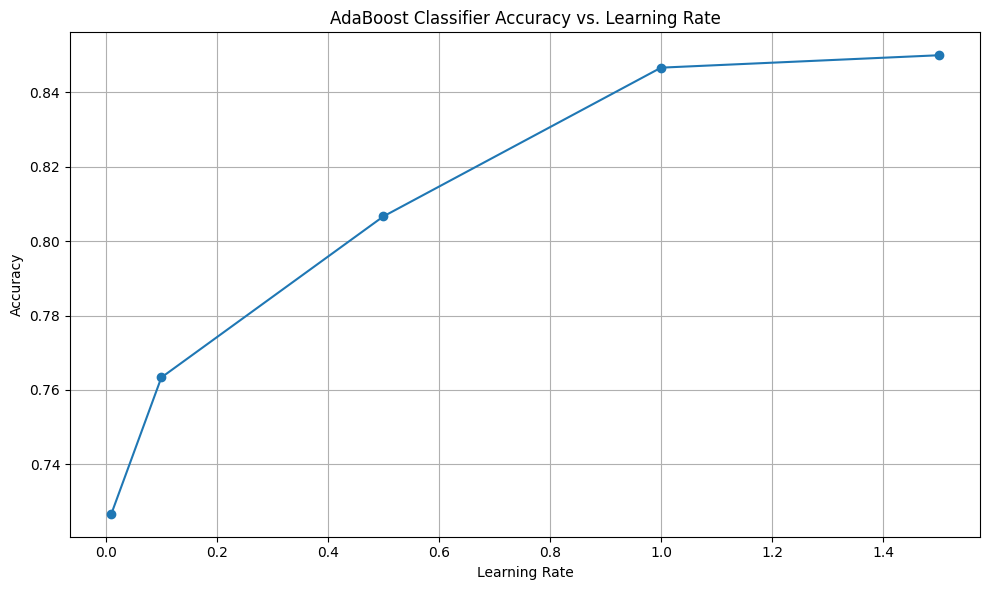

In [ ]:
#Q29
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Using the classification data from Problem 14 for consistency
X_clf, y_clf = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)

# 1. Define different learning rates to test
learning_rates = [0.01, 0.1, 0.5, 1.0, 1.5]
accuracies_ada_lr = []

# 2. Train and evaluate for each learning rate
for lr in learning_rates:
    ada_clf_lr = AdaBoostClassifier(learning_rate=lr, random_state=42)
    ada_clf_lr.fit(X_train_clf, y_train_clf)
    y_pred_lr = ada_clf_lr.predict(X_test_clf)
    acc_lr = accuracy_score(y_test_clf, y_pred_lr)
    accuracies_ada_lr.append(acc_lr)
    print(f"AdaBoost Classifier with learning rate {lr} Accuracy: {acc_lr:.4f}")

# 3. Plot the results
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, accuracies_ada_lr, marker='o')
plt.title('AdaBoost Classifier Accuracy vs. Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Q30
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import log_loss
import xgboost as xgb # Ensure xgboost is installed: pip install xgboost

# 1. Create a multi-class dataset
X_multi, y_multi = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5,
                                       n_classes=3, n_clusters_per_class=1, random_state=42)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.3, random_state=42, stratify=y_multi)

# 2. Train an XGBoost Classifier for multi-class (use_label_encoder removed)
xgb_clf_multi = xgb.XGBClassifier(objective='multi:softprob', num_class=3, eval_metric='mlogloss', random_state=42)
xgb_clf_multi.fit(X_train_multi, y_train_multi)

# 3. Get probability predictions for each class and evaluate using log-loss
y_pred_proba_multi = xgb_clf_multi.predict_proba(X_test_multi)
logloss_multi = log_loss(y_test_multi, y_pred_proba_multi)
print(f"XGBoost Classifier (Multi-class) Log-Loss: {logloss_multi:.4f}")

XGBoost Classifier (Multi-class) Log-Loss: 0.1831
